# <font style = "color:rgb(77, 173, 255)"> **Diamonds - Machine Learning Notebook** </font>

In this notebook, we will build machine learning models that will process both Categorical + Numerical Features. 

The steps we will use to build, train, and test our models will be:

> Create the dataset  
 
> Build the model

> Fit the model

> Predict model results

> Score the model

> Cross Validate the results

## <font style = "color:rgb(77, 173, 255)"> **Import Library** </font>

The following libraries are required to run this code:

In [1]:
import numpy as np

import pandas as pd

import plotly.express as px

import time

from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.model_selection import cross_validate

In [2]:
# to display nice model diagram
from sklearn import set_config

set_config(display = 'diagram')

## <font style = "color:rgb(77, 173, 255)"> **Loading the Dataset** </font>

In [3]:
# Specify the path to data source

diamonds_source_path = "../Diamonds/diamond.csv"

In [4]:
# Create a dataframe called 'diamonds'. This object holds the contents of our data in tabular format

diamonds = pd.read_csv(diamonds_source_path)

diamonds

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


## <font style = "color:rgb(77, 173, 255)"> **Converting Numerical to Categorical** </font>

In [5]:
# Create a categorical feature for Price

diamonds['Price Cat'] = pd.cut(diamonds['Price'], bins = [0, 20000, 40000, 60000, 80000, 100000, 120000], 
       labels = ['20k', '40k','60k','80k','100k', '120k'])

diamonds 

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Price Cat
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,20k
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,20k
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,20k
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,20k
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,20k
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,20k
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,20k
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,20k
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,20k


## <font style = "color:rgb(77, 173, 255)"> **Creating a Target** </font>

In [6]:
target_column = 'Price Cat'

In [8]:
target = diamonds[target_column]

target

0       20k
1       20k
2       20k
3       20k
4       20k
       ... 
5995    20k
5996    20k
5997    20k
5998    20k
5999    40k
Name: Price Cat, Length: 6000, dtype: category
Categories (6, object): ['20k' < '40k' < '60k' < '80k' < '100k' < '120k']

In [10]:
target.value_counts()

20k     4988
40k      873
60k      112
80k       22
100k       4
120k       1
Name: Price Cat, dtype: int64

In [11]:
pd.options.plotting.backend = "plotly"

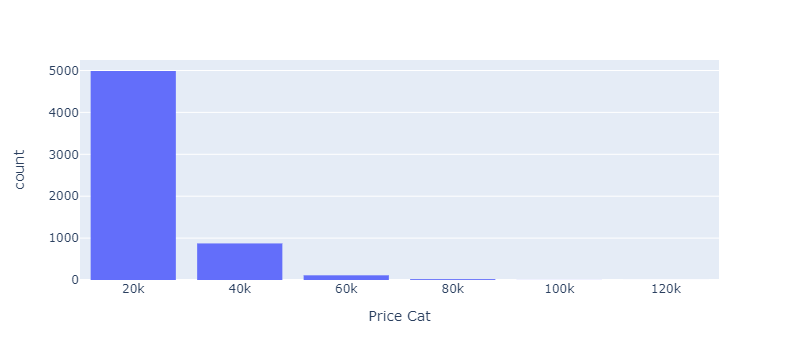

In [14]:
diamonds.plot(kind = 'hist', 
        x = 'Price Cat')

## <font style = "color:rgb(77, 173, 255)"> **Creating the Dataset** </font>

In [15]:
# A list that will store the columns to drop from the dataset

columns_to_drop = ['Price', 'Price Cat']

In [16]:
data =  diamonds.drop(columns_to_drop, axis = 1)

data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA
...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA
5996,1.00,Very Good,D,SI1,VG,VG,GIA
5997,1.02,Ideal,D,SI1,EX,EX,GIA
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA


## <font style = "color:rgb(77, 173, 255)"> **Creating a Training / Testing Set** </font>

In [18]:
data_train, data_test, target_train, target_test = train_test_split(data, 
                                                                    target, 
                                                                    random_state = 50) # default split 75% training & 25% testing

## <font style = "color:rgb(77, 173, 255)"> **Identifying Categorical vs. Numerical Features** </font>

### <font style = "color:rgb(77, 173, 255)"> **Numerical Features** </font>

In [19]:
numerical_columns_selector = selector(dtype_exclude = object)

In [20]:
numerical_columns = numerical_columns_selector(data)

numerical_columns 

['Carat Weight']

### <font style = "color:rgb(77, 173, 255)"> **Categorical Features** </font>

In [21]:
categorical_columns_selector = selector(dtype_include = object)

In [22]:
categorical_columns = categorical_columns_selector(data)

categorical_columns

['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

## <font style = "color:rgb(77, 173, 255)"> **Preprocessors** </font>

The following steps are used to build preprocesors that will be used by our model to handle both categorical as well as numerical features.

### <font style = "color:rgb(77, 173, 255)"> **Categorical Pre-Processor** </font>

In [24]:
# Create a categorical pre-processor

ordinal_encoder_preprocessor = OrdinalEncoder()

ordinal_encoder_preprocessor

OrdinalEncoder()

### <font style = "color:rgb(77, 173, 255)"> **Numerical Pre-Processor** </font>

In [25]:
# Create a numercial pre-processor

standard_scaler_preprocessor = StandardScaler()

standard_scaler_preprocessor

StandardScaler()

### <font style = "color:rgb(77, 173, 255)"> **Combining Preprocessors together** </font>

In [26]:
preprocessor = ColumnTransformer([('ordinal_encoder', ordinal_encoder_preprocessor, categorical_columns),
                                  ('standard_scaler', standard_scaler_preprocessor, numerical_columns)
                                 ]
                                )

preprocessor

ColumnTransformer(transformers=[('ordinal_encoder', OrdinalEncoder(),
                                 ['Cut', 'Color', 'Clarity', 'Polish',
                                  'Symmetry', 'Report']),
                                ('standard_scaler', StandardScaler(),
                                 ['Carat Weight'])])

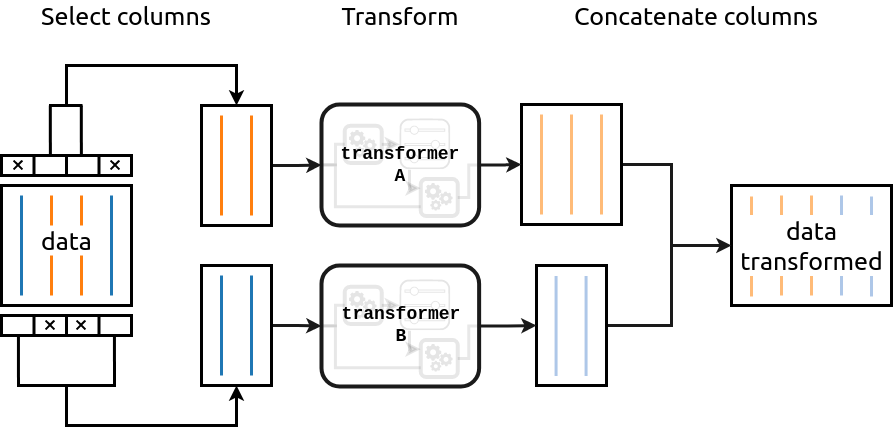

## <font style = "color:rgb(77, 173, 255)"> **Building the Models** </font>

### <font style = "color:rgb(77, 173, 255)"> **Logistic Regression Model** </font>

In [28]:
logistic_regression_nml = make_pipeline(preprocessor,
                                        LogisticRegression(),
                                        )

logistic_regression_nml

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Carat Weight'])])),
                ('logisticregression', LogisticRegression())])

### <font style = "color:rgb(77, 173, 255)"> **Decision Tree Model** </font>

In [29]:
tree_model_nml = make_pipeline(preprocessor,
                               DecisionTreeClassifier(),
                               )

tree_model_nml

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Carat Weight'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### <font style = "color:rgb(77, 173, 255)"> **KNN Model** </font>

In [30]:
knn_model_nml = make_pipeline(preprocessor,
                              KNeighborsClassifier(),
                              )

knn_model_nml

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Carat Weight'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### <font style = "color:rgb(77, 173, 255)"> **Random Forest Model** </font>

In [31]:
forest_model_nml = make_pipeline(preprocessor,
                                 RandomForestClassifier(),
                                )

forest_model_nml

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Carat Weight'])])),
                ('randomforestclassifier', RandomForestClassifier())])

### <font style = "color:rgb(77, 173, 255)"> **SVC Model** </font>

In [32]:
svc_model_nml = make_pipeline(preprocessor,
                              SVC(),
                              )

svc_model_nml

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Carat Weight'])])),
                ('svc', SVC())])

## <font style = "color:rgb(77, 173, 255)"> **Fitting the models** </font>

### <font style = "color:rgb(77, 173, 255)"> **Logistic Regression Model** </font>

In [33]:
start = time.time()

logistic_regression_nml.fit(data_train, target_train) 

lr_elapsed_time = time.time() - start

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### <font style = "color:rgb(77, 173, 255)"> **Decision Tree Model** </font>

In [34]:
start = time.time()

tree_model_nml.fit(data_train, target_train) 

tree_elapsed_time = time.time() - start

### <font style = "color:rgb(77, 173, 255)"> **KNN Model** </font>

In [35]:
start = time.time()

knn_model_nml.fit(data_train, target_train) 

knn_elapsed_time = time.time() - start

### <font style = "color:rgb(77, 173, 255)"> **Random Forest Model** </font>

In [36]:
start = time.time()

forest_model_nml.fit(data_train, target_train)

forest_elapsed_time = time.time() - start

### <font style = "color:rgb(77, 173, 255)"> **SVC Model** </font>

In [37]:
start = time.time()

svc_model_nml.fit(data_train, target_train) 

svc_elapsed_time = time.time() - start

## <font style = "color:rgb(77, 173, 255)"> **Checking Model Predictions** </font>

### <font style = "color:rgb(77, 173, 255)"> **Logistic Regression Prediction** </font>

In [44]:
predicted_target_lr = logistic_regression_nml.predict(data_test) 

### <font style = "color:rgb(77, 173, 255)"> **Decision Tree Prediction** </font>

In [39]:
predicted_target_tree = tree_model_nml.predict(data_test) 

### <font style = "color:rgb(77, 173, 255)"> **KNN Prediction** </font>

In [40]:
predicted_target_knn = knn_model_nml.predict(data_test) 

### <font style = "color:rgb(77, 173, 255)"> **Random Forest Prediction** </font>

In [41]:
predicted_target_forest = forest_model_nml.predict(data_test) 

### <font style = "color:rgb(77, 173, 255)"> **SVC Prediction** </font>

In [42]:
predicted_target_svc = svc_model_nml.predict(data_test) 

## <font style = "color:rgb(77, 173, 255)"> **Visualizing the results** </font>

In [52]:
# Create a dataframe with the target test and the predicted results from all the models 
# The instructions on how to do this come from this website: https://www.statology.org/add-numpy-array-to-pandas-dataframe/

results_diamonds = pd.DataFrame({'Target': target_test,
                           'Logistic Regression Results': predicted_target_lr,
                           'Decision Tree Results': predicted_target_tree,
                           'KNN Results': predicted_target_knn,
                           'Random Forest Results': predicted_target_forest,
                           'SVC Results': predicted_target_svc
                          }
                         )

diamonds_predicted= results_diamonds.sort_values("Target")

diamonds_predicted

,Target,Logistic Regression Results,Decision Tree Results,KNN Results,Random Forest Results,SVC Results
4879,20k,20k,20k,20k,20k,20k
2376,20k,40k,40k,40k,20k,20k
4911,20k,20k,20k,20k,20k,20k
383,20k,20k,20k,20k,20k,20k
3202,20k,20k,20k,20k,20k,20k
...,...,...,...,...,...,...
5083,80k,40k,80k,20k,60k,40k
230,80k,80k,80k,40k,80k,40k
2846,80k,60k,80k,40k,60k,60k
2790,80k,80k,60k,40k,60k,40k


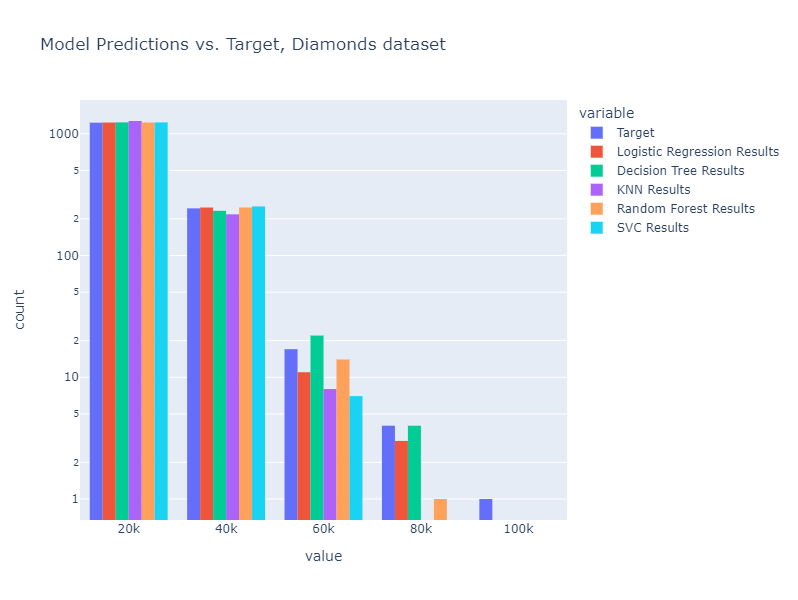

In [73]:
diamonds_predicted.plot(kind = 'hist',
                barmode = 'group',
                log_y = True,
                title = 'Model Predictions vs. Target, Diamonds dataset',
                height = 600)

## <font style = "color:rgb(77, 173, 255)"> **Model Scoring** </font>

### <font style = "color:rgb(77, 173, 255)"> **Logistic Regression** </font>

In [61]:
score_lr = logistic_regression_nml.score(data_test, target_test)

In [64]:
print(f"The accuracy using a Logist Regression Model is {score_lr:.3f} "
      f"with a fitting time of {lr_elapsed_time:.3f} seconds ")

The accuracy using a Logist Regression Model is 0.952 with a fitting time of 0.215 seconds 


## <font style = "color:rgb(77, 173, 255)"> **Decision Tree** </font>

In [65]:
score_tree = tree_model_nml.score(data_test, target_test)

In [66]:
print(f"The accuracy using a Decision Tree Model is {score_tree:.3f} "
      f"with a fitting time of {tree_elapsed_time:.3f} seconds ")

The accuracy using a Decision Tree Model is 0.960 with a fitting time of 0.037 seconds 


### <font style = "color:rgb(77, 173, 255)"> **KNN** </font>

In [67]:
score_knn = knn_model_nml.score(data_test, target_test)

In [68]:
print(f"The accuracy using a KNN Model is {score_knn:.3f} "
      f"with a fitting time of {knn_elapsed_time:.3f} seconds ")

The accuracy using a KNN Model is 0.941 with a fitting time of 0.038 seconds 


### <font style = "color:rgb(77, 173, 255)"> **Random Forest** </font>

In [69]:
score_forest = forest_model_nml.score(data_test, target_test)

In [70]:
print(f"The accuracy using a Random Forest Model is {score_forest:.3f} "
      f"with a fitting time of {forest_elapsed_time:.3f} seconds ")

The accuracy using a Random Forest Model is 0.969 with a fitting time of 0.253 seconds 


### <font style = "color:rgb(77, 173, 255)"> **SVC** </font>

In [71]:
score_svc = svc_model_nml.score(data_test, target_test)

In [74]:
print(f"The accuracy using a SVC Model is {score_svc:.3f} "
      f"with a fitting time of {svc_elapsed_time:.3f} seconds ")

The accuracy using a SVC Model is 0.953 with a fitting time of 0.172 seconds 


## <font style = "color:rgb(77, 173, 255)"> **Cross Validation** </font>

### <font style = "color:rgb(77, 173, 255)"> **Logistic Regression** </font>

In [75]:
# Logistic Regression Cross-Validation

cv_result_lr = cross_validate(logistic_regression_nml,
                              data, 
                              target, 
                              cv = 6)

cv_result_lr

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=6.

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer

{'fit_time': array([0.20830417, 0.20694375, 0.19933224, 0.20931411, 0.21926808,
        0.20431757]),
 'score_time': array([0.00597978, 0.00797129, 0.00797462, 0.00598049, 0.00797391,
        0.00797367]),
 'test_score': array([0.954, 0.939, 0.948, 0.944, 0.949, 0.953])}

In [84]:
# Logistic Regression results

cv_scores_lr = cv_result_lr["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_lr.mean():.3f} +/- {cv_scores_lr.std():.3f}")

The mean cross-validation accuracy is: 0.948 +/- 0.005


### <font style = "color:rgb(77, 173, 255)"> **Decision Tree** </font>

In [85]:
# Decision Tree Clasifier Cross-Validation

cv_result_tree = cross_validate(tree_model_nml,
                                data, 
                                target, 
                                cv = 6)

cv_result_tree

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=6.



{'fit_time': array([0.02492046, 0.0189352 , 0.01893711, 0.01893568, 0.01692033,
        0.02690649]),
 'score_time': array([0.00697637, 0.00398731, 0.00498295, 0.0049839 , 0.00799036,
        0.00503039]),
 'test_score': array([0.96 , 0.964, 0.97 , 0.964, 0.961, 0.964])}

In [86]:
# Decision Tree Clasifier Cross-Validation results

cv_scores_tree = cv_result_tree["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_tree.mean():.3f} +/- {cv_scores_tree.std():.3f}")

The mean cross-validation accuracy is: 0.964 +/- 0.003


### <font style = "color:rgb(77, 173, 255)"> **KNN** </font>

In [87]:
# KNN Clasifier Cross-Validation

cv_result_knn = cross_validate(knn_model_nml,
                               data, 
                               target, 
                               cv = 6)

cv_result_knn

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=6.



{'fit_time': array([0.02890229, 0.0239203 , 0.03090048, 0.02389073, 0.02192664,
        0.02391791]),
 'score_time': array([0.03289056, 0.03588009, 0.03195143, 0.04149842, 0.03289676,
        0.03089881]),
 'test_score': array([0.934, 0.937, 0.943, 0.937, 0.943, 0.949])}

In [88]:
# KNN Clasifier Cross-Validation results

cv_scores_knn = cv_result_knn["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_knn.mean():.3f} +/- {cv_scores_knn.std():.3f}")

The mean cross-validation accuracy is: 0.941 +/- 0.005


### <font style = "color:rgb(77, 173, 255)"> **Random Forest** </font>

In [89]:
# KNN Clasifier Cross-Validation

cv_result_forest = cross_validate(forest_model_nml,
                                  data, 
                                  target, 
                                  cv = 6)

cv_result_forest

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=6.



{'fit_time': array([0.27278876, 0.23637342, 0.24115038, 0.24924278, 0.24018955,
        0.22191978]),
 'score_time': array([0.0228796 , 0.02292538, 0.02391934, 0.02291584, 0.0248642 ,
        0.02765322]),
 'test_score': array([0.971, 0.961, 0.971, 0.964, 0.966, 0.964])}

In [90]:
# Random Forest Clasifier Cross-Validation results

cv_scores_forest = cv_result_forest["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_forest.mean():.3f} +/- {cv_scores_forest.std():.3f}")

The mean cross-validation accuracy is: 0.966 +/- 0.004


### <font style = "color:rgb(77, 173, 255)"> **SVC** </font>

In [91]:
# SVClasifier Cross-Validation

cv_result_svc = cross_validate(svc_model_nml,
                               data, 
                               target, 
                               cv = 6)

cv_result_svc

C:\Users\lslem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=6.



{'fit_time': array([0.18143749, 0.18990946, 0.20131683, 0.19036245, 0.19637394,
        0.19041348]),
 'score_time': array([0.069767  , 0.06979871, 0.07770586, 0.07575679, 0.08773541,
        0.08367157]),
 'test_score': array([0.947, 0.937, 0.945, 0.943, 0.955, 0.953])}

In [ ]:
# SVClasifier Cross-Validation reslts
cv_scores_svc = cv_result_svc["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_svc.mean():.3f} +/- {cv_scores_svc.std():.3f}")